# Dataset

Dataset : https://www.kaggle.com/snehaanbhawal/resume-dataset

## Import

In [4]:
! pip install spacy gensim pyLDAvis wordcloud plotly nltk
import nltk
nltk.download(['stopwords','wordnet'])
#spacy
! pip install spacy
import spacy
from spacy.pipeline import EntityRuler
from spacy.lang.en import English
from spacy.tokens import Doc

#gensim
import gensim
from gensim import corpora

#Visualization
from spacy import displacy
import pyLDAvis.gensim_models
from wordcloud import WordCloud
import plotly.express as px
import matplotlib.pyplot as plt

#Data loading/ Data manipulation
import pandas as pd
import numpy as np
! pip install jsonlines
import jsonlines

#nltk
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download(['stopwords','wordnet'])

#warning
import warnings 
warnings.filterwarnings('ignore')
## For dropdown
import numpy as np
import pandas as pd
import textwrap

import ipywidgets as widgets
from ipywidgets import interact, interact_manual
import IPython.display
from IPython.display import display, clear_output

import plotly.graph_objects as go

  Using cached pyLDAvis-3.4.1-py3-none-any.whl (2.6 MB)
  Using cached wordcloud-1.9.1.1.tar.gz (222 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached plotly-5.14.1-py2.py3-none-any.whl (15.3 MB)
  Using cached pandas-2.0.1-cp311-cp311-win_amd64.whl (10.6 MB)
  Using cached numexpr-2.8.4-cp311-cp311-win_amd64.whl (92 kB)
  Running setup.py clean for wordcloud
Failed to build wordcloud
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
  Running setup.py install for wordcloud: started
  Running setup.py install for wordcloud: finished with status 'error'


  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [20 lines of output]
      running bdist_wheel
      running build
      running build_py
      creating build
      creating build\lib.win-amd64-cpython-311
      creating build\lib.win-amd64-cpython-311\wordcloud
      copying wordcloud\color_from_image.py -> build\lib.win-amd64-cpython-311\wordcloud
      copying wordcloud\tokenization.py -> build\lib.win-amd64-cpython-311\wordcloud
      copying wordcloud\wordcloud.py -> build\lib.win-amd64-cpython-311\wordcloud
      copying wordcloud\wordcloud_cli.py -> build\lib.win-amd64-cpython-311\wordcloud
      copying wordcloud\_version.py -> build\lib.win-amd64-cpython-311\wordcloud
      copying wordcloud\__init__.py -> build\lib.win-amd64-cpython-311\wordcloud
      copying wordcloud\__main__.py -> build\lib.win-amd64-cpython-311\wordcloud
      copying wordcloud\stopwords -> build\lib.win-amd64-cpython-311\wordcloud


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


ModuleNotFoundError: No module named 'pyLDAvis'

# Resume Dataset


In [2]:
df = pd.read_csv("Resume.csv")



In [3]:
df = df.reindex(np.random.permutation(df.index))
data = df.copy().iloc[0:1000,]
data.head()

,ID,Resume_str,Resume_html,Category
1698,20981299,ENGINEERING ASSISTANT Summary ...,"<div class=""fontsize fontface vmargins hmargin...",ENGINEERING
2426,25718772,TSO/FLOATER Career Overview ...,"<div class=""fontsize fontface vmargins hmargin...",AVIATION
923,14140903,GRADUATE RESEARCH ASSISTANT Pro...,"<div class=""fontsize fontface vmargins hmargin...",AGRICULTURE
2250,35492909,TAX ACCOUNTANT Professional S...,"<div class=""MPR skn-cbg1 fontsize fontface vma...",BANKING
1938,14900898,CONSTRUCTION MANAGER Summar...,"<div class=""fontsize fontface vmargins hmargin...",CONSTRUCTION


In [4]:
! python -m spacy download en_core_web_lg

nlp = spacy.load("en_core_web_lg")
# nlp = spacy.load("en_core_web_sm")


     -------------------------------------- 587.7/587.7 MB 1.3 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


In [5]:

skill_pattern_path = "jz_skill_patterns.jsonl"

### **Entity Ruler**
To create an entity ruler we need to add a pipeline and then load the .jsonl file containing skills into ruler. As you can see we have successfully added a new pipeline entity_ruler. Entity ruler helps us add additional rules to highlight various categories within the text, such as skills and job description in our case.

In [6]:
ruler = nlp.add_pipe("entity_ruler")
ruler.from_disk(skill_pattern_path)
nlp.pipe_names

['tok2vec',
 'tagger',
 'parser',
 'attribute_ruler',
 'lemmatizer',
 'ner',
 'entity_ruler']

### **Skills**


In [7]:
def get_skills(text):
    doc = nlp(text)
    myset = []
    subset = []
    for ent in doc.ents:
        if ent.label_ == "SKILL":
            subset.append(ent.text)
    myset.append(subset)
    return subset


def unique_skills(x):
    return list(set(x))

### Cleaning Resume 


In [8]:
clean = []
for i in range(data.shape[0]):
    review = re.sub(
        '(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?"',
        " ",
        data["Resume_str"].iloc[i],
    )
    review = review.lower()
    review = review.split()
    lm = WordNetLemmatizer()
    review = [
        lm.lemmatize(word)
        for word in review
        if not word in set(stopwords.words("english"))
    ]
    review = " ".join(review)
    clean.append(review)

### **Applying functions**


In [9]:
data["Clean_Resume"] = clean
data["skills"] = data["Clean_Resume"].str.lower().apply(get_skills)
data["skills"] = data["skills"].apply(unique_skills)
data.head()

,ID,Resume_str,Resume_html,Category,Clean_Resume,skills
1698,20981299,ENGINEERING ASSISTANT Summary ...,"<div class=""fontsize fontface vmargins hmargin...",ENGINEERING,engineering assistant summary product process ...,"[robot, deployment, project management, schedu..."
2426,25718772,TSO/FLOATER Career Overview ...,"<div class=""fontsize fontface vmargins hmargin...",AVIATION,tso floater career overview obtain position pr...,"[network security, server, industrial engineer..."
923,14140903,GRADUATE RESEARCH ASSISTANT Pro...,"<div class=""fontsize fontface vmargins hmargin...",AGRICULTURE,graduate research assistant profile result dri...,[certificate]
2250,35492909,TAX ACCOUNTANT Professional S...,"<div class=""MPR skn-cbg1 fontsize fontface vma...",BANKING,tax accountant professional summary skill quic...,"[accounting, marketing, medium, business, docu..."
1938,14900898,CONSTRUCTION MANAGER Summar...,"<div class=""fontsize fontface vmargins hmargin...",CONSTRUCTION,construction manager summary energetic constru...,[specification]


## **Data Analysis And Visualization**

In [10]:
fig = px.histogram(
    data, x="Category", title="Distribution of Jobs Categories"
).update_xaxes(categoryorder="total descending")
fig.show()

In [11]:
Job_cat = data["Category"].unique()
Job_cat = np.append(Job_cat, "ALL")

In [12]:
Job_cat

array(['ENGINEERING', 'AVIATION', 'AGRICULTURE', 'BANKING',
       'CONSTRUCTION', 'ADVOCATE', 'ACCOUNTANT', 'FINANCE', 'HR',
       'FITNESS', 'CHEF', 'PUBLIC-RELATIONS', 'BUSINESS-DEVELOPMENT',
       'CONSULTANT', 'DESIGNER', 'HEALTHCARE', 'TEACHER', 'APPAREL',
       'DIGITAL-MEDIA', 'SALES', 'ARTS', 'INFORMATION-TECHNOLOGY',
       'AUTOMOBILE', 'BPO', 'ALL'], dtype=object)

In [13]:
def dropdown_menu_widget(Job_Category):
    output=widgets.Output()
    drop_Job=widgets.Dropdown(options = Job_Category, value=None, description='Job Category:')
    
    for cat in Job_Category:
        def dropdown_Job_eventhandler(change):
            display(input_widgets)
            job_choice=change.new
            IPython.display.clear_output(wait=True)
    drop_Job.observe(dropdown_Job_eventhandler,names='value')
    input_widgets=widgets.HBox([drop_Job])
    display(input_widgets)
    IPython.display.clear_output(wait=True)


In [14]:
dropdown_menu_widget(Job_cat)

In [15]:
Job_Category="INFORMATION-TECHNOLOGY"

In [16]:
Total_skills = []
if Job_Category != "ALL":
    fltr = data[data["Category"] == Job_Category]["skills"]
    for x in fltr:
        for i in x:
            Total_skills.append(i)
else:
    fltr = data["skills"]
    for x in fltr:
        for i in x:
            Total_skills.append(i)



In [17]:
fig = px.histogram(
    x=Total_skills,
    labels={"x": "Skills"},
    title=f"{Job_Category} Distribution of Skills",
).update_xaxes(categoryorder="total descending")
fig.show()

### **Most common words**


Text(0.5, 1.0, 'Most Used Words in INFORMATION-TECHNOLOGY Resume')

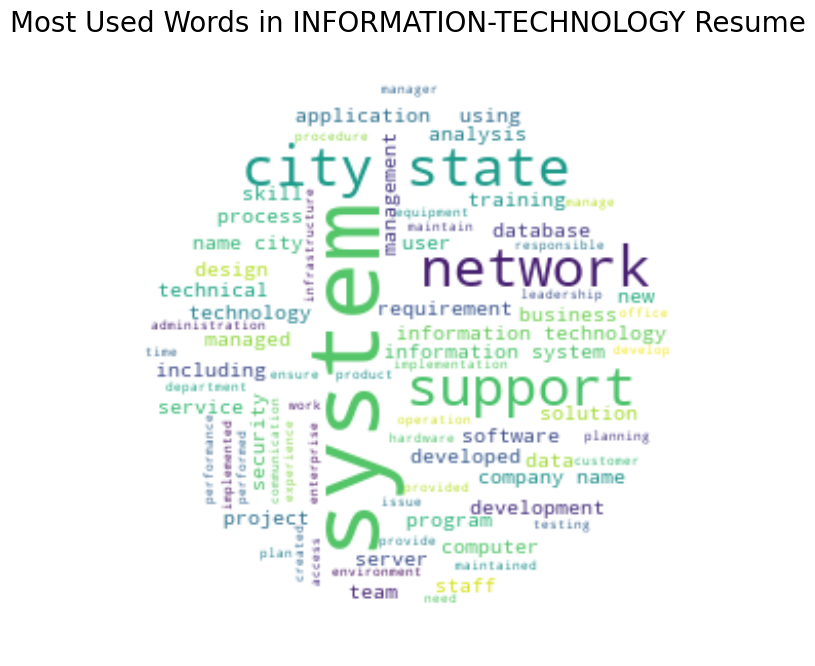

In [18]:
text = ""
for i in data[data["Category"] == Job_Category]["Clean_Resume"].values:
    text += i + " "

plt.figure(figsize=(8, 8))

x, y = np.ogrid[:300, :300]

mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)

wc = WordCloud(
    width=800,
    height=800,
    background_color="white",
    min_font_size=6,
    repeat=True,
    mask=mask,
)
wc.generate(text)

plt.axis("off")
plt.imshow(wc, interpolation="bilinear")
plt.title(f"Most Used Words in {Job_Category} Resume", fontsize=20)

### **Entity Recognition**
We can also display various entities within our raw text by using spaCy displacy.render. I am in love with this function as it is an amazing way to look at your entire document and discover SKILL or GEP within your Resume.

In [19]:
sent = nlp(data["Resume_str"].iloc[0])
displacy.render(sent, style="ent", jupyter=True)

### **Dependency Parsing**
We can also visualize dependencies by just changing style to dep as shown below. We have also limited words to 10 which includes space too. Limiting the words will make it visualize the small chunk of data and if you want to see the dependency, you can remove the filter.

In [20]:
displacy.render(sent[0:10], style="dep", jupyter=True, options={"distance": 90})

## **Custom Entity Recognition**


In [21]:
patterns = df.Category.unique()
for a in patterns:
    ruler.add_patterns([{"label": "Job-Category", "pattern": a}])

In [22]:
# options=[{"ents": "Job-Category", "colors": "#ff3232"},{"ents": "SKILL", "colors": "#56c426"}]
colors = {
    "Job-Category": "linear-gradient(90deg, #aa9cfc, #fc9ce7)",
    "SKILL": "linear-gradient(90deg, #9BE15D, #00E3AE)",
    "ORG": "#ffd966",
    "PERSON": "#e06666",
    "GPE": "#9fc5e8",
    "DATE": "#c27ba0",
    "ORDINAL": "#674ea7",
    "PRODUCT": "#f9cb9c",
}
options = {
    "ents": [
        "Job-Category",
        "SKILL",
        "ORG",
        "PERSON",
        "GPE",
        "DATE",
        "ORDINAL",
        "PRODUCT",
    ],
    "colors": colors,
}
sent = nlp(data["Resume_str"].iloc[5])
displacy.render(sent, style="ent", jupyter=True, options=options)

## **Resume Analysis**

## **Single Resume Analyzer**


In [23]:
import PyPDF2
import tkinter as tk
from tkinter import filedialog
from tkinter import ttk

# Create a Tkinter root window
root = tk.Tk()
root.title("Resume Recommendation System")

# Define style for the widgets
style = ttk.Style()
style.configure('TLabel', foreground='black', font=('Arial', 12))
style.configure('TButton', foreground='black', font=('Arial', 12))
style.configure('TEntry', foreground='black', font=('Arial', 12))

# Define a function to handle the file chooser button click event
def choose_file():
    # Get the desired skills from the entry widget
    input_skills = tag_entry.get()

    file_path = filedialog.askopenfilename()
    if file_path:
        # Open the selected PDF file in read binary mode
        with open(file_path, 'rb') as pdf_file:
            # Create a PDF reader object
            pdf_reader = PyPDF2.PdfReader(pdf_file)
            # Read the text from each page of the PDF file
            pdf_text = []
            for page_num in range(len(pdf_reader.pages)):
                page_obj = pdf_reader.pages[page_num]
                pdf_text.append(page_obj.extract_text())
            # Join the text from each page into a single string
            input_resume = '\n'.join(pdf_text)

            # Now you can use the 'text' variable to store the extracted text from the PDF file
            sent2 = nlp(input_resume)
            displacy.render(sent2, style="ent", jupyter=True, options=options)


            req_skills = input_skills.lower().split(",")
            resume_skills = unique_skills(get_skills(input_resume.lower()))
            score = 0
            for x in req_skills:
                if x in resume_skills:
                    score += 1
            req_skills_len = len(req_skills)
            match = round(score / req_skills_len * 100, 1)
            result_textbox.delete(1.0, tk.END)
            result_textbox.insert(tk.END, f"The current Resume is {match}% matched to your requirements\n{resume_skills}")

# Create a label for the user to enter their desired skills
tag_label = ttk.Label(root, text="Enter desired skills (comma-separated): ")
tag_label.pack()

# Create an entry widget for the user to enter their desired skills
tag_entry = ttk.Entry(root)
tag_entry.pack()

# Create a label for the file chooser button
file_label = ttk.Label(root, text="Upload Resume:")
file_label.pack()

# Create a file chooser button
file_button = ttk.Button(root, text="Choose File", command=choose_file)
file_button.pack()

# Create a label to display the result
result_label = ttk.Label(root, text="Result: ")
result_label.pack()

# Create a text box to display the result
result_textbox = tk.Text(root, height=10, width=50)
result_textbox.pack()

# Create an exit button to close the Tkinter window
exit_button = ttk.Button(root, text="Exit", command=root.destroy)
exit_button.pack()

# Start the Tkinter event loop
root.mainloop()


**Resume Recommender**


In [ ]:
import os
import PyPDF2
import tkinter as tk
from tkinter import filedialog
import pandas as pd


def get_resume_skills(resume_text):
    resume_skills = get_skills(resume_text.lower())
    return unique_skills(resume_skills)


def calculate_match_score(req_skills, resume_skills):
    score = 0
    for skill in req_skills:
        if skill in resume_skills:
            score += 1
    req_skills_len = len(req_skills)
    match_score = round(score / req_skills_len * 100, 1)
    return match_score


def extract_resume_text(pdf_path):
    with open(pdf_path, 'rb') as f:
        pdf_reader = PyPDF2.PdfReader(f)
        resume_text = ''
        for page_num in range(len(pdf_reader.pages)):
            page = pdf_reader.pages[page_num]
            resume_text += page.extract_text()
        resume_skills = get_resume_skills(resume_text)
        return resume_text, resume_skills


def process_resumes(resumes_folder, req_skills, ground_truth_file=None):
    resumes = os.listdir(resumes_folder)
    match_scores = []
    for resume_file in resumes:
        if not resume_file.endswith('.pdf'):
            continue
        resume_path = os.path.join(resumes_folder, resume_file)
        resume_text, resume_skills = extract_resume_text(resume_path)
        match_score = calculate_match_score(req_skills, resume_skills)
        match_scores.append((match_score, resume_file, resume_skills))

    # Sort resumes by match score
    top_resumes = sorted(match_scores, reverse=True)[:10] # Get top 10 resumes with highest match scores

    # If ground truth file is provided, calculate precision, recall, and F1 score
    if ground_truth_file is not None:
        ground_truth = pd.read_csv(ground_truth_file)
        relevant_resumes = set(ground_truth[ground_truth['relevant'] == 1]['resume'].values)
        selected_resumes = set([resume_file for _, resume_file, _ in top_resumes])
        true_positives = len(relevant_resumes & selected_resumes)
        false_positives = len(selected_resumes - relevant_resumes)
        false_negatives = len(relevant_resumes - selected_resumes)
        precision = true_positives / (true_positives + false_positives)
        recall = true_positives / (true_positives + false_negatives)
        
        if precision != 0 or recall != 0:
            f1_score = 2 * precision * recall / (precision + recall)
        else:
            f1_score = 0

        return top_resumes, precision, recall, f1_score
    else:
        return top_resumes, None, None, None


def process_input():
    # Get the input skills from the user
    input_skills = input_skills_entry.get().lower().split(",")

    # Get the resumes folder from the user using a file dialog
    resumes_folder = filedialog.askdirectory(title="Select Resumes Folder")

    # Get the ground truth file from the user using a file dialog
    ground_truth_file = filedialog.askopenfilename(title="Select Ground Truth File",
                                                   filetypes=[("CSV Files", "*.csv")])

    # Process the resumes
    top_resumes, precision, recall, f1_score = process_resumes(resumes_folder, input_skills, ground_truth_file)

    # Print the results to the text widget
    result_text.delete("1.0", tk.END)
    result_text.insert(tk.END, "Top Resumes:\n")
    for i, (match_score, resume_file, resume_skills) in enumerate(top_resumes):
        result_text.insert(tk.END, f"{i+1}. {resume_file} (Match Score: {match_score}%)\n")
        result_text.insert(tk.END, f"Skills: {', '.join(resume_skills)}\n\n")

    if precision is not None and recall is not None and f1_score is not None:
        result_text.insert(tk.END, f"Precision: {precision}\n")
        result_text.insert(tk.END, f"Recall: {recall}\n")
        result_text.insert(tk.END, f"F1 Score: {f1_score}\n")

# Create the main window
root = tk.Tk()
root.title("Resume Matcher")

# Create the input skills label and entry widget
input_skills_label = tk.Label(root, text="Enter required skills (comma-separated): ")
input_skills_label.grid(row=0, column=0, padx=10, pady=10)
input_skills_entry = tk.Entry(root)
input_skills_entry.grid(row=0, column=1, padx=10, pady=10)

# Create the resumes folder label and button
resumes_folder_label = tk.Label(root, text="Select Resumes Folder: ")
resumes_folder_label.grid(row=1, column=0, padx=10, pady=10)
resumes_folder_button = tk.Button(root, text="Browse", command=lambda: input_folder.set(filedialog.askdirectory(title="Select Resumes Folder")))
resumes_folder_button.grid(row=1, column=1, padx=10, pady=10)
input_folder = tk.StringVar()
input_folder.set("")

# Create the ground truth file label and button
ground_truth_label = tk.Label(root, text="Select Ground Truth File: ")
ground_truth_label.grid(row=2, column=0, padx=10, pady=10)
ground_truth_button = tk.Button(root, text="Browse", command=lambda: input_file.set(filedialog.askopenfilename(title="Select Ground Truth File", filetypes=[("CSV Files", "*.csv")])))
ground_truth_button.grid(row=2, column=1, padx=10, pady=10)
input_file = tk.StringVar()
input_file.set("")

# Create the submit button
submit_button = tk.Button(root, text="Submit", command=process_input)
submit_button.grid(row=3, column=0, padx=10, pady=10)

# Create the result text widget
result_text = tk.Text(root, width=80, height=20)
result_text.grid(row=4, column=0, columnspan=2, padx=10, pady=10)

# Start the main loop
root.mainloop()


### **Topic Modeling - LDA**


In [ ]:
docs = data["Clean_Resume"].values
dictionary = corpora.Dictionary(d.split() for d in docs)
bow = [dictionary.doc2bow(d.split()) for d in docs]
lda = gensim.models.ldamodel.LdaModel
num_topics = 4
ldamodel = lda(
    bow, 
    num_topics=num_topics, 
    id2word=dictionary, 
    passes=50, 
    minimum_probability=0
)
ldamodel.print_topics(num_topics=num_topics)

## pyLDAvis
The best way to visualize Topics is to use pyLDAvis from GENSIM.

* topic #1 appears to relate to the project,management,system.
* topic #2 relates to management,company,business.
* topic #3 relates to customer,services , state.
* topic #4 relates to state,city,student.

In [ ]:
pyLDAvis.enable_notebook()
pyLDAvis.gensim_models.prepare(ldamodel, bow, dictionary)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.032417 -0.005577       1        1  28.052168
3      0.106296  0.051770       2        1  27.739142
0     -0.023824 -0.116722       3        1  22.507677
1     -0.114889  0.070529       4        1  21.701013, topic_info=            Term         Freq        Total Category  logprob  loglift
156    marketing  1826.000000  1826.000000  Default  30.0000  30.0000
72      customer  4752.000000  4752.000000  Default  29.0000  29.0000
483      project  3202.000000  3202.000000  Default  28.0000  28.0000
529       system  2721.000000  2721.000000  Default  27.0000  27.0000
223         sale  3445.000000  3445.000000  Default  26.0000  26.0000
..           ...          ...          ...      ...      ...      ...
98    experience   478.954031  2212.447335   Topic4  -5.6510  -0.0024
376  development   460.549586  2272.024900   Topic4  -5.6901  -0.0682
227      service   480.884278  3666.142730   Topic4  -5.6469  -0.5035
231        skill   456.533789  3207.983132   Topic4  -5.6989  -0.4219
170          new   434.195197  2471.836806   Topic4  -5.7491  -0.2114

[372 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
4517      4  0.988804       3d
8         1  0.670871  account
8         2  0.083587  account
8         3  0.228508  account
8         4  0.017369  account
...     ...       ...      ...
275       4  0.286472     work
9499      2  0.961537    wound
9626      3  0.965180       wy
5840      4  0.979793      xml
1903      2  0.977560     yoga

[793 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 4, 1, 2])